In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cars = pd.read_csv('cars.csv')

In [27]:
cars.head()

,StockType,Title,Exterior,Interior,Transmission,Drivetrain,Price,Mileage,Year,Make,Model,ext_code,int_code
0,USED,2004 Mazda RX-8 Sport Automatic,Gray,Black,Automatic,RWD,3999,105793.0,2004,Mazda,RX-8 Sport Automatic,0,0
1,USED,2016 Mercedes-Benz AMG GT AMG GT S,Blue,Other,Automatic,RWD,68500,32114.0,2016,Mercedes-Benz,AMG GT AMG GT S,1,1
2,USED,2017 INFINITI Q60 3.0T Premium,Gray,Gray,Automatic,RWD,22500,56419.0,2017,INFINITI,Q60 3.0T Premium,0,2
3,USED,1992 Honda Prelude S,Black,Black,Manual,FWD,2998,261237.0,1992,Honda,Prelude S,2,0
4,USED,2016 Scion tC w/ sunroof,White,Gray,Other / Unknown,FWD,14000,41690.0,2016,Scion,tC w/ sunroof,3,2


In [6]:
cars = cars.drop('Unnamed: 0', axis=1)

In [9]:
cars['Year'] = cars['Title'].apply(lambda x: x.split(' ', 2)[0])
cars['Make'] = cars['Title'].apply(lambda x: x.split(' ', 2)[1])
cars['Mileage'] = cars['Mileage'].apply(lambda x: 0 if x == 'MSRP' else x)

In [11]:
cars['Model'] = cars[['Title', 'Year', 'Make']].apply(lambda x: x[0].replace(f'{x[1]} {x[2]} ', ''), axis=1)

In [13]:
cars['Year'] = pd.to_numeric(cars['Year'])

In [15]:
cars['Mileage'] = pd.to_numeric(cars['Mileage'], errors='coerce')

In [16]:
cars = cars.dropna(how='any', axis=0)

In [18]:
len(cars)

9777

In [20]:
cars['Price'] = pd.to_numeric(cars['Price'])

In [22]:
ext_colors = list(cars['Exterior'].unique())

In [23]:
int_colors = list(cars['Interior'].unique())

In [25]:
ext_key = {ext_colors[i]: i for i in range(len(ext_colors))}
ext_key_inv = {v: k for v, k in ext_key.items()}

int_key = {int_colors[i]: i for i in range(len(int_colors))}
int_key_inv = {v: k for v, k in int_key.items()}

In [26]:
cars['ext_code'] = cars['Exterior'].map(ext_key)
cars['int_code'] = cars['Interior'].map(int_key)

In [28]:
cars.corr()

,Price,Mileage,Year,ext_code,int_code
Price,1.000000,-0.300186,0.096336,0.152536,-0.054979
Mileage,-0.300186,1.000000,-0.472857,0.046552,0.040077
Year,0.096336,-0.472857,1.000000,-0.170072,-0.153317
ext_code,0.152536,0.046552,-0.170072,1.000000,-0.052649
int_code,-0.054979,0.040077,-0.153317,-0.052649,1.000000


In [29]:
makes = list(cars.Make.unique())

Mazda
	83 cars with values > 23000
	43 cars with values < 23000


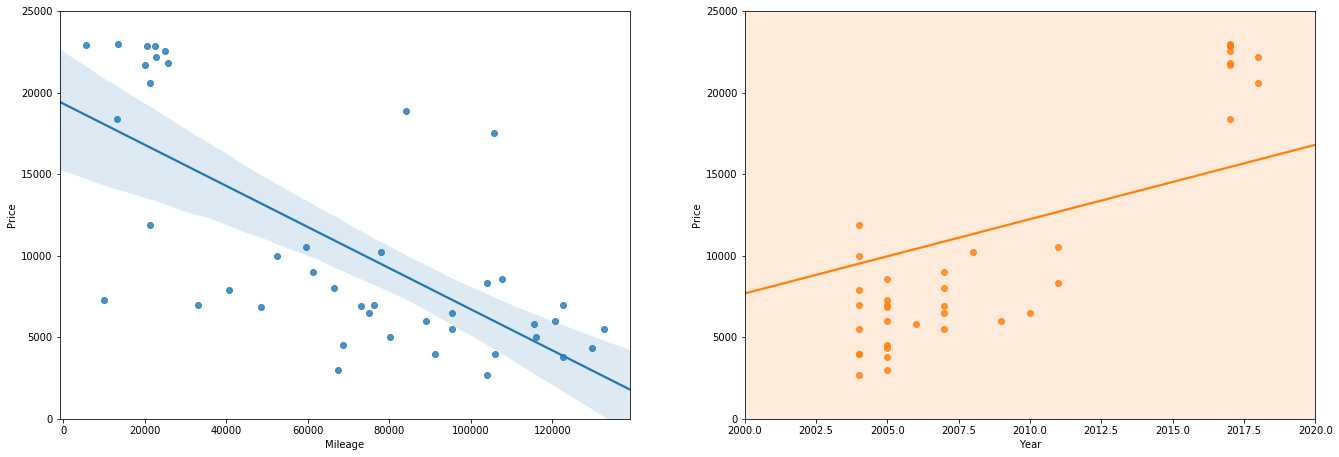

Mercedes-Benz
	536 cars with values > 23000
	136 cars with values < 23000


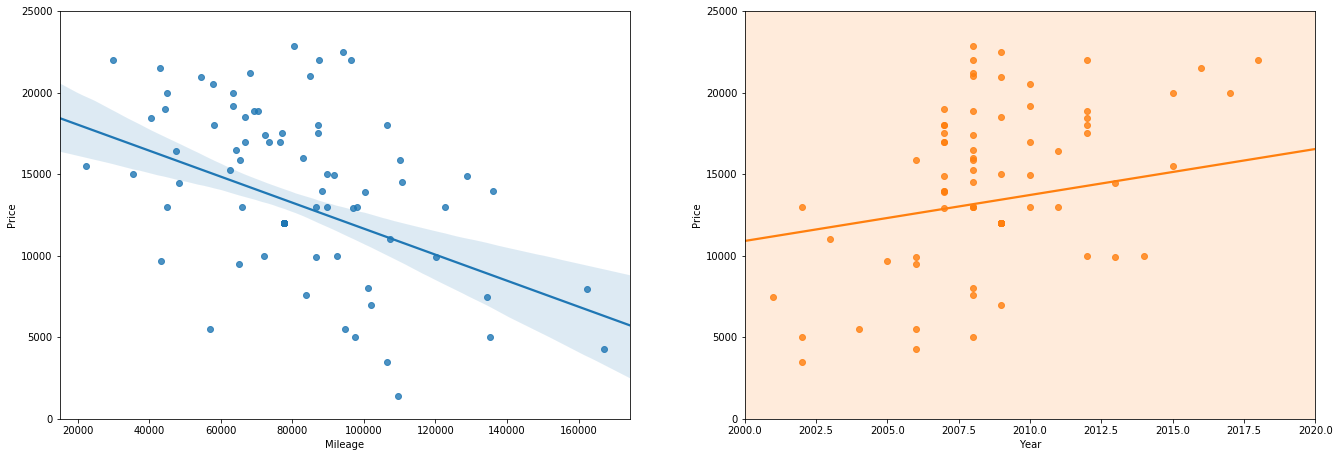

INFINITI
	138 cars with values > 23000
	105 cars with values < 23000


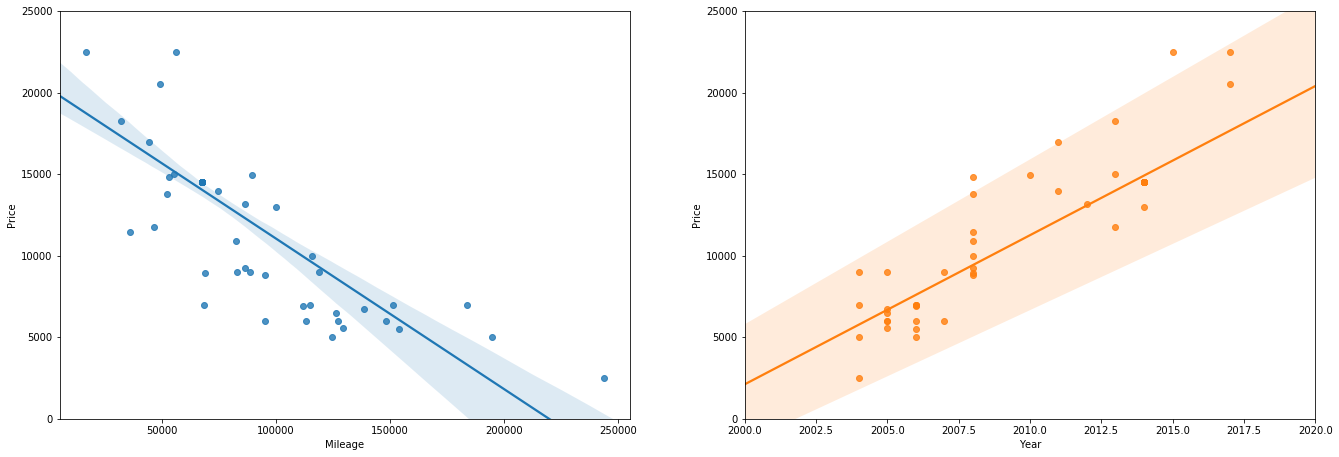

Honda
	67 cars with values > 23000
	324 cars with values < 23000


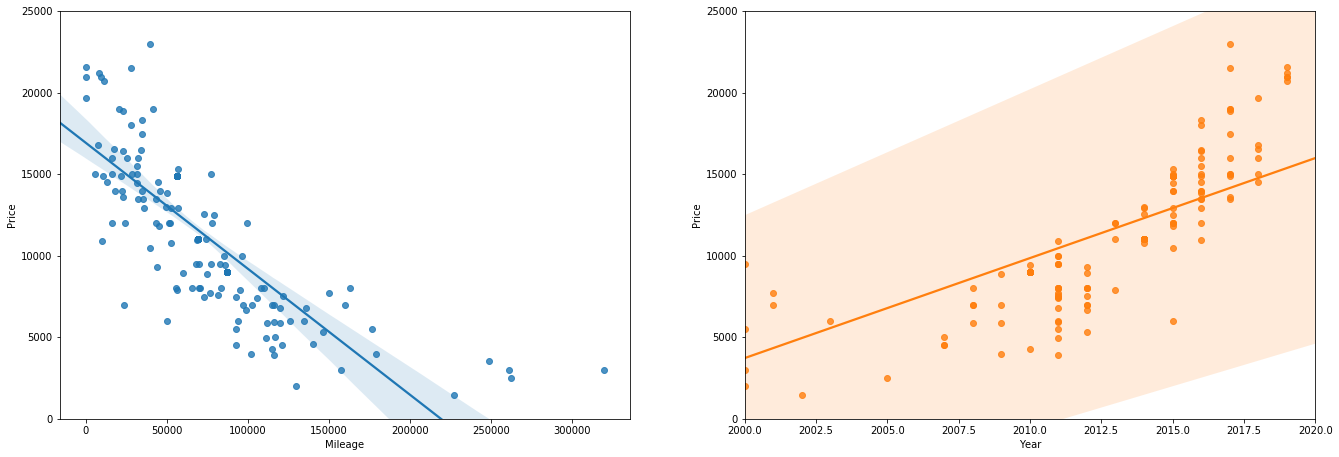

Scion
	1 cars with values > 23000
	499 cars with values < 23000


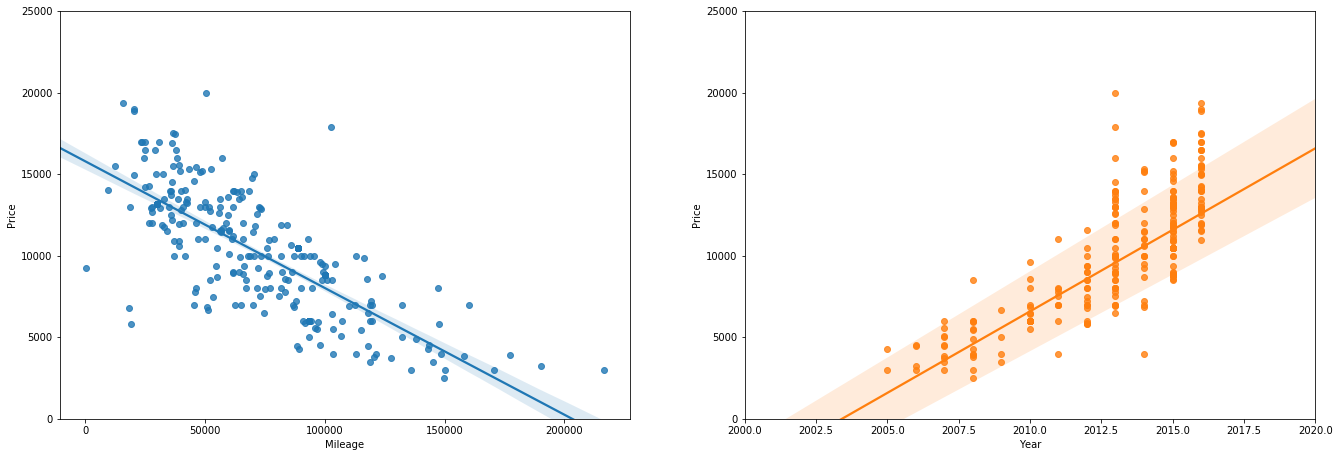

Audi
	423 cars with values > 23000
	135 cars with values < 23000


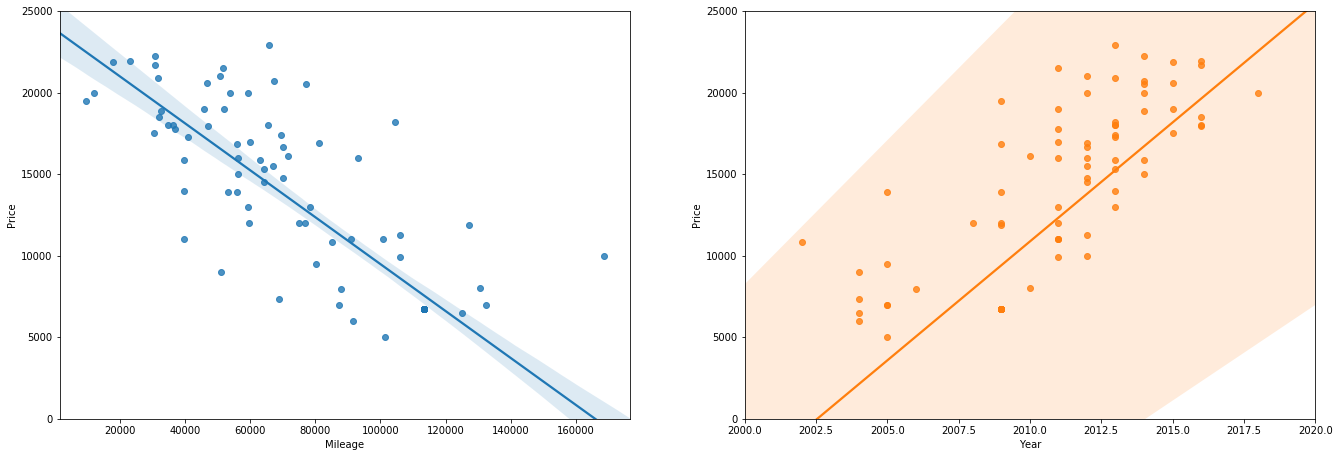

smart
	0 cars with values > 23000
	118 cars with values < 23000


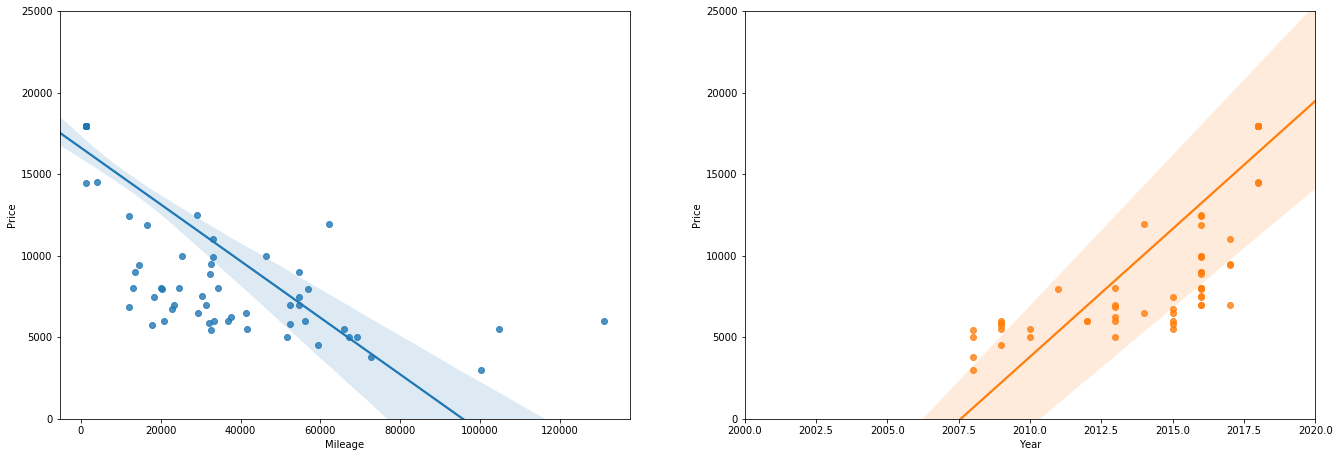

Nissan
	67 cars with values > 23000
	102 cars with values < 23000


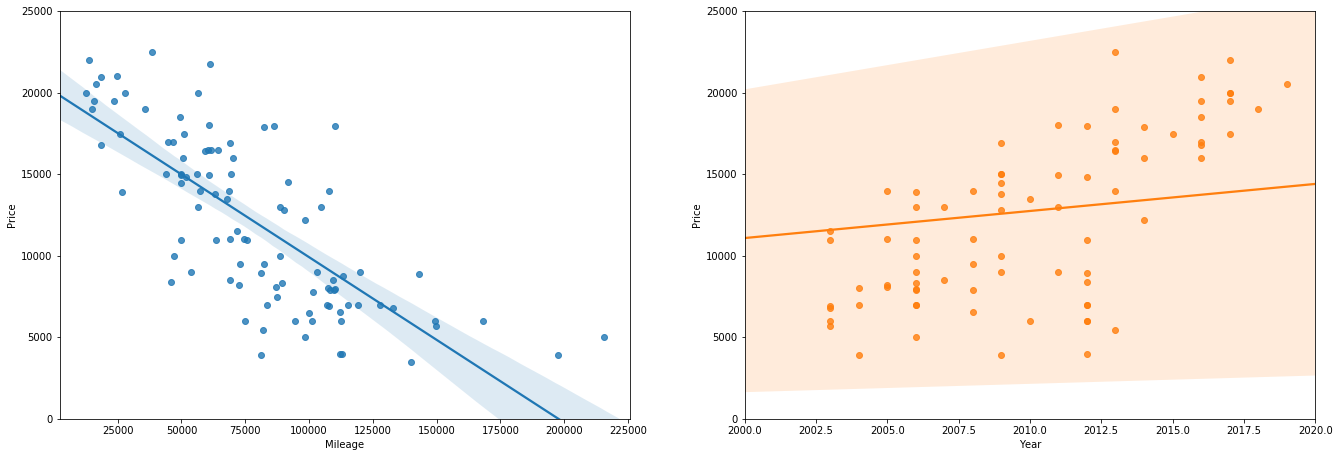

Chrysler
	0 cars with values > 23000
	100 cars with values < 23000


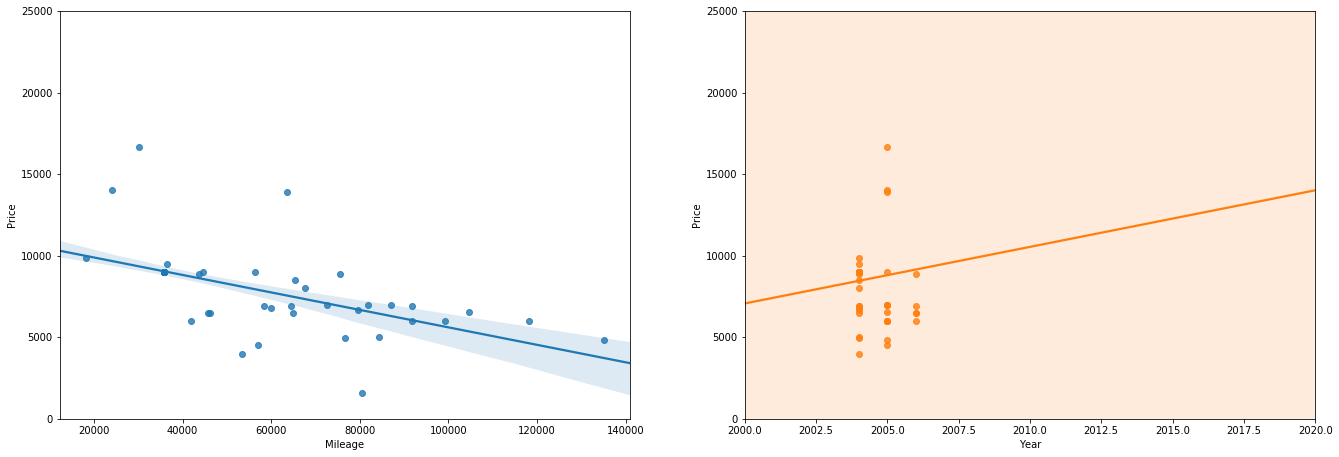

Porsche
	268 cars with values > 23000
	21 cars with values < 23000


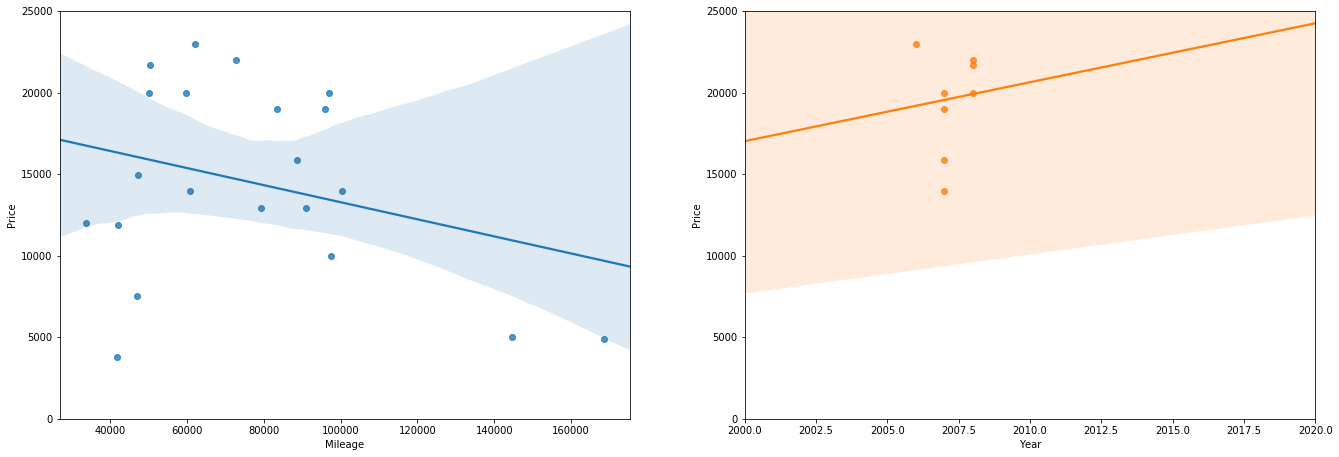

Ford
	646 cars with values > 23000
	113 cars with values < 23000


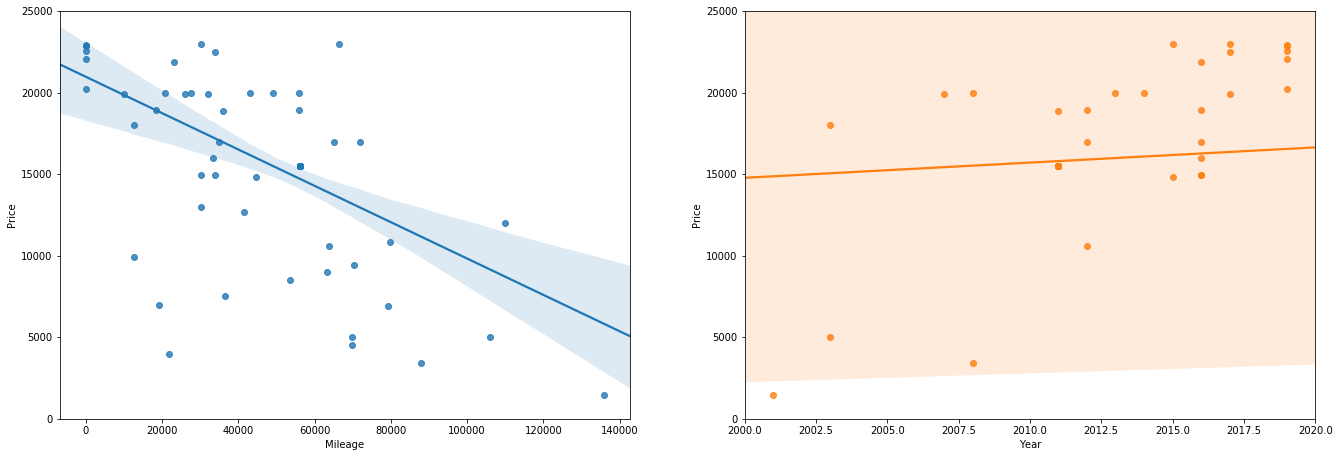

Hyundai
	3 cars with values > 23000
	165 cars with values < 23000


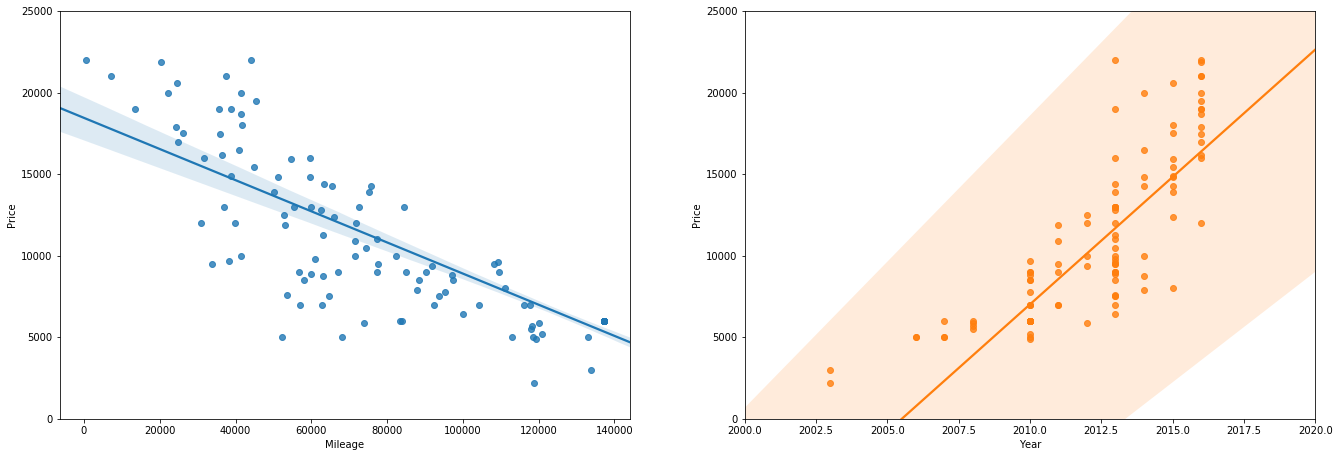

Pontiac
	6 cars with values > 23000
	240 cars with values < 23000


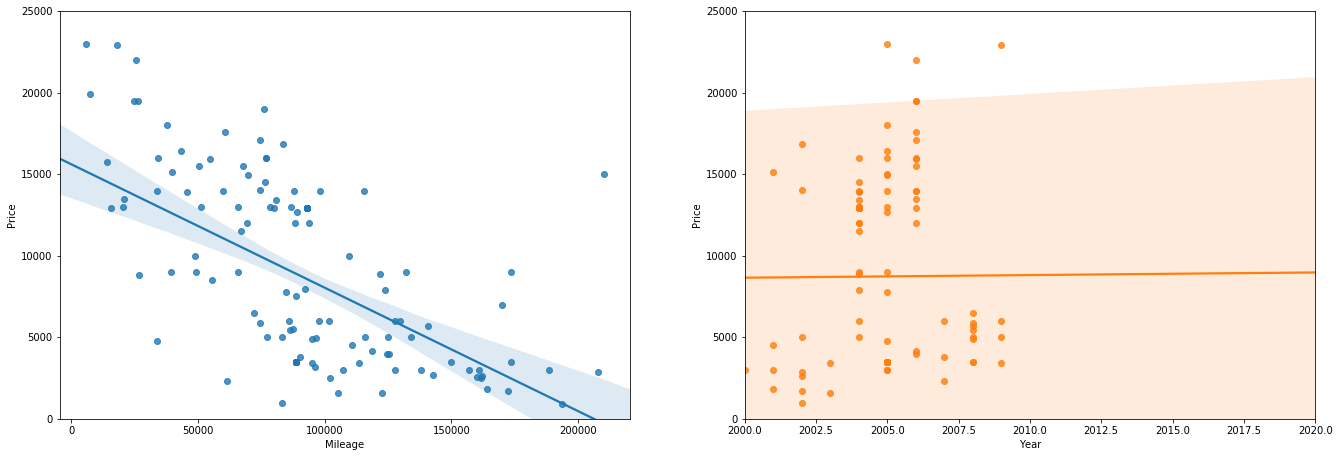

BMW
	759 cars with values > 23000
	625 cars with values < 23000


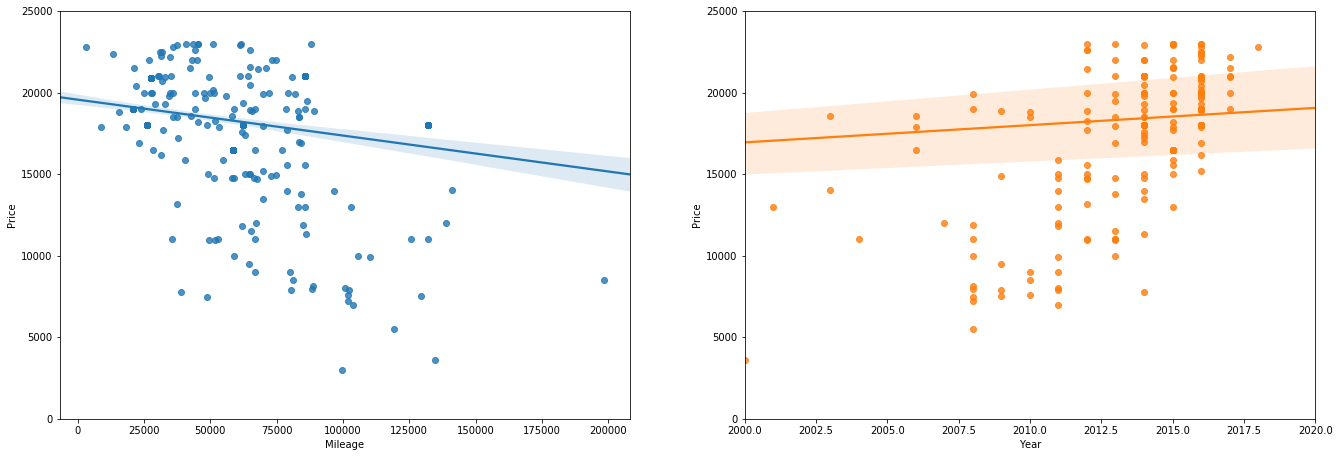

Jaguar
	265 cars with values > 23000
	19 cars with values < 23000


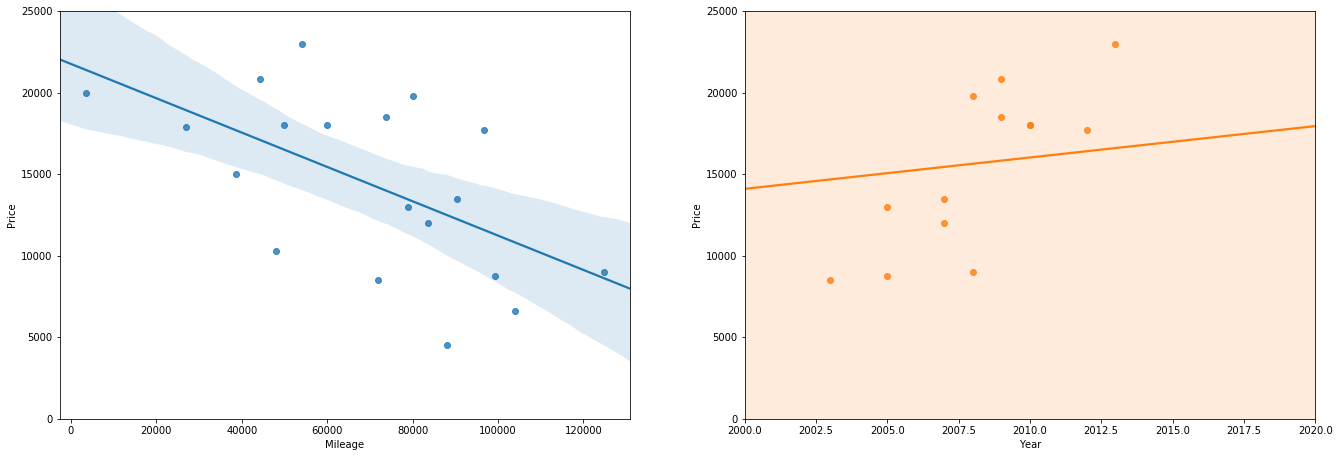

Chevrolet
	465 cars with values > 23000
	545 cars with values < 23000


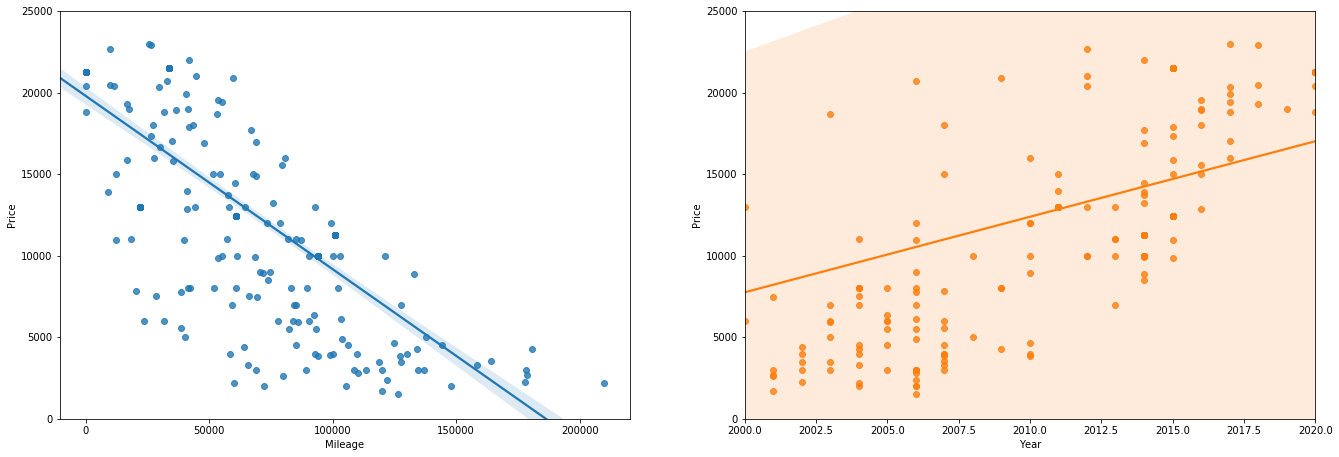

Acura
	104 cars with values > 23000
	24 cars with values < 23000


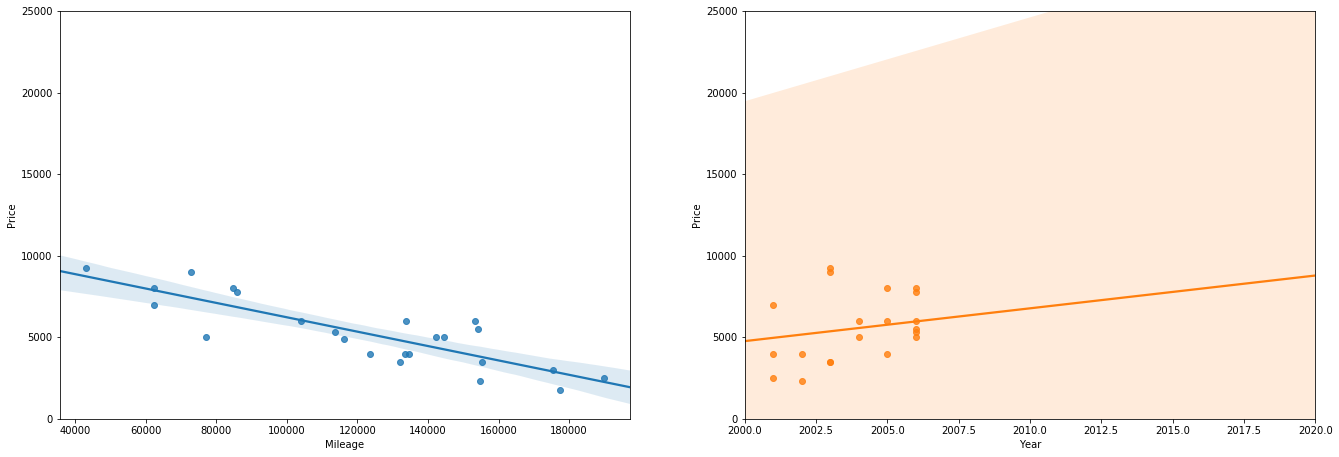

Volkswagen
	0 cars with values > 23000
	17 cars with values < 23000


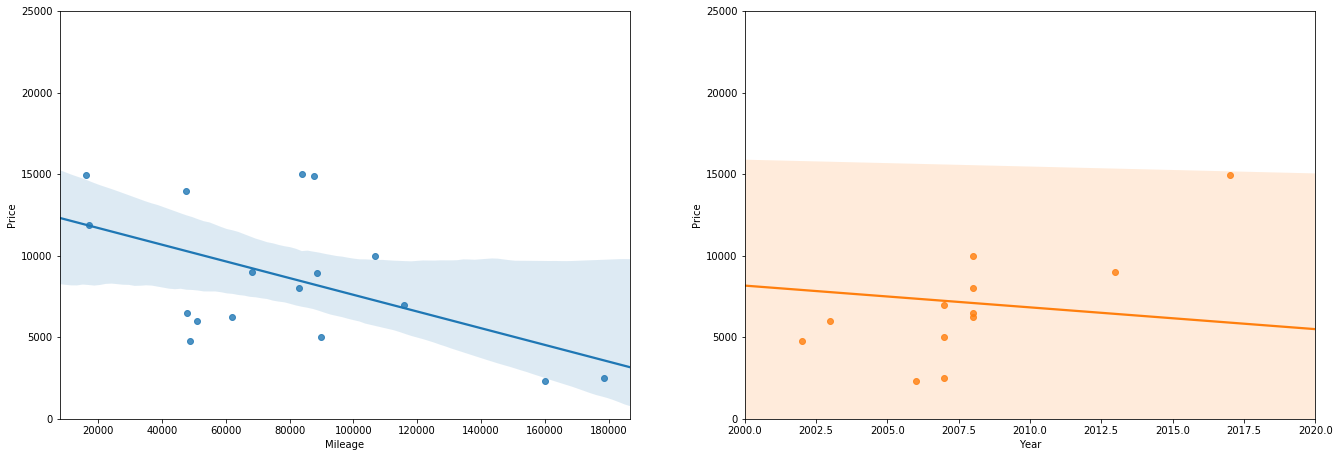

Lexus
	386 cars with values > 23000
	16 cars with values < 23000


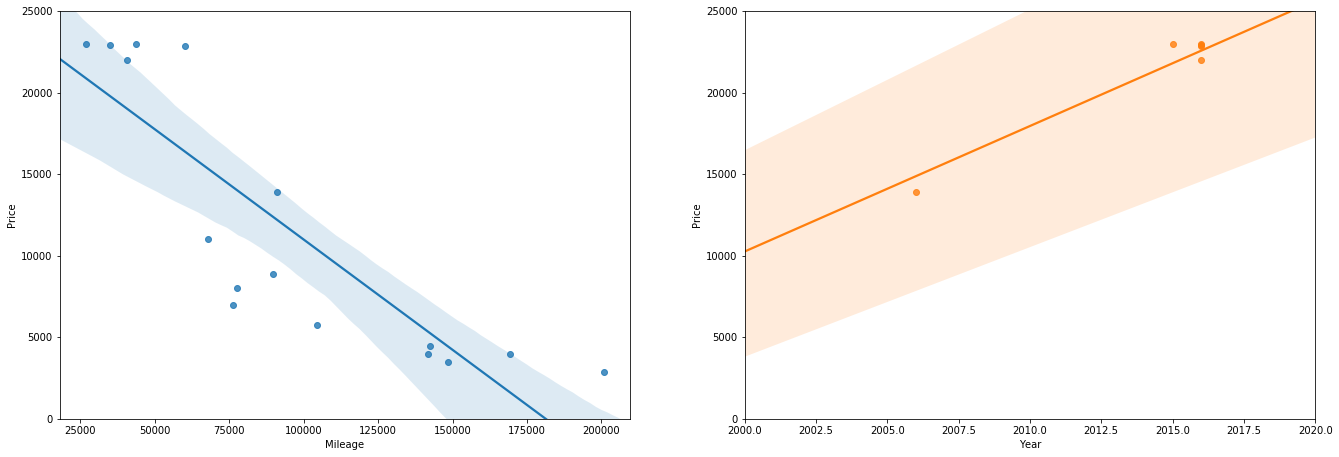

Aston
	103 cars with values > 23000
	0 cars with values < 23000


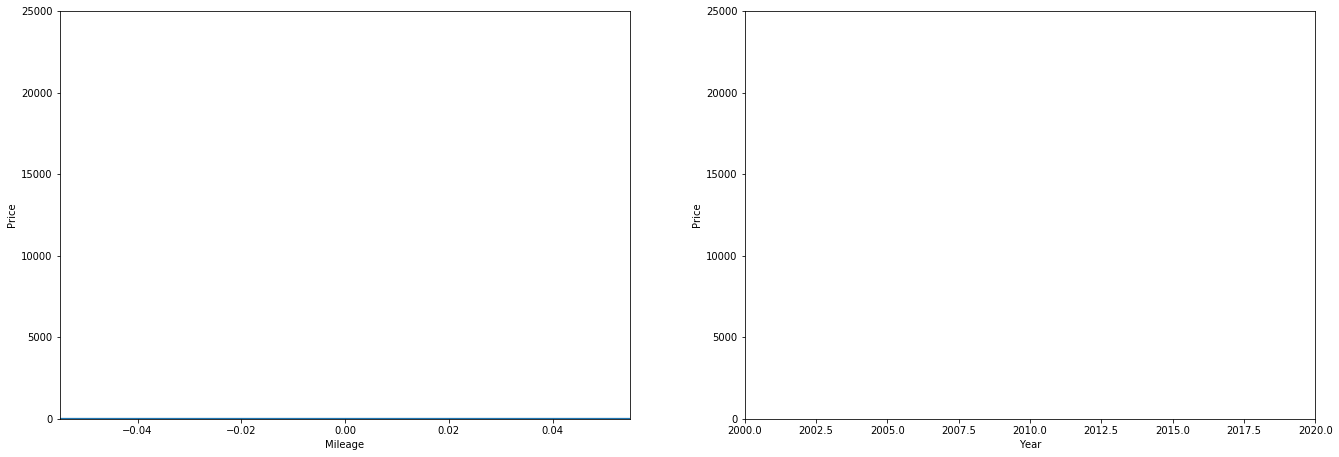

Lincoln
	0 cars with values > 23000
	4 cars with values < 23000


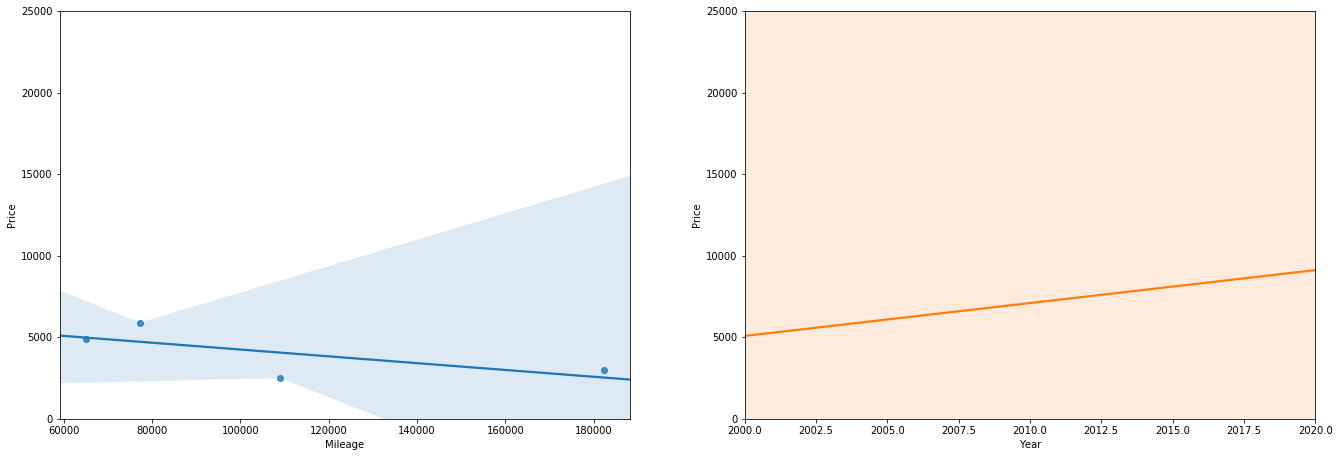

Subaru
	10 cars with values > 23000
	110 cars with values < 23000


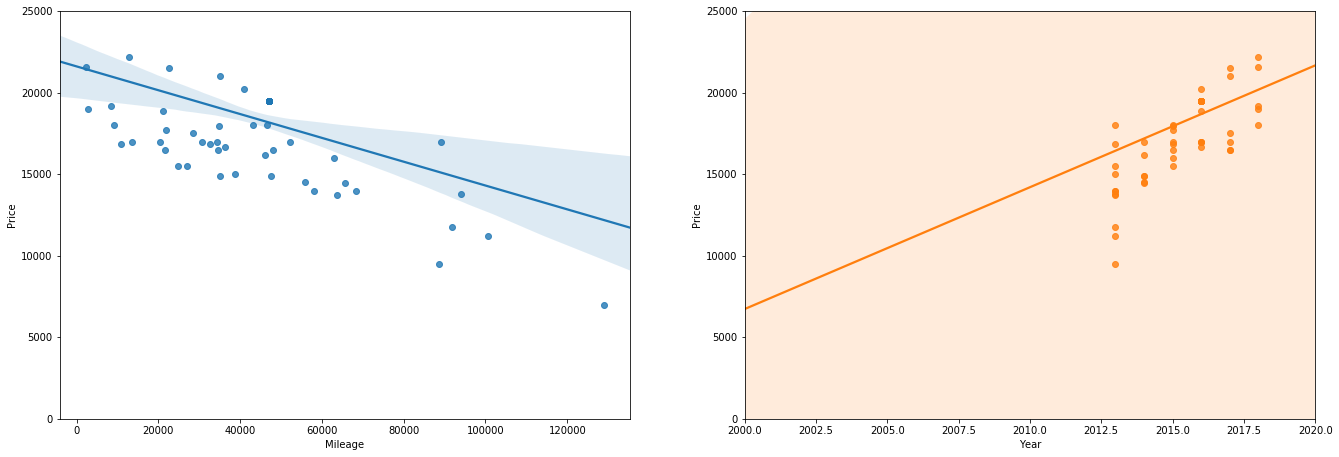

Lotus
	27 cars with values > 23000
	0 cars with values < 23000


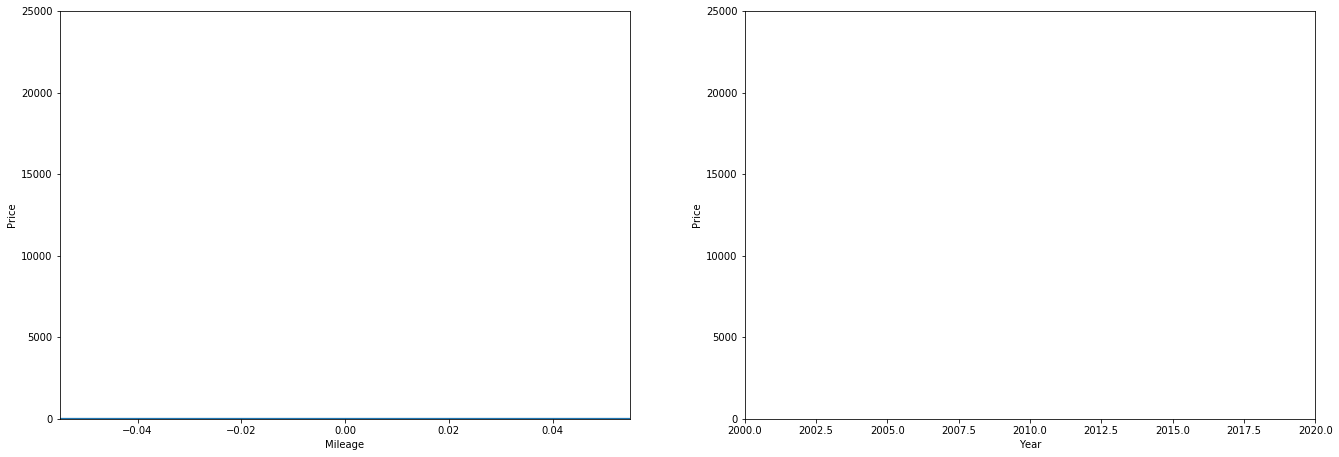

Toyota
	151 cars with values > 23000
	130 cars with values < 23000


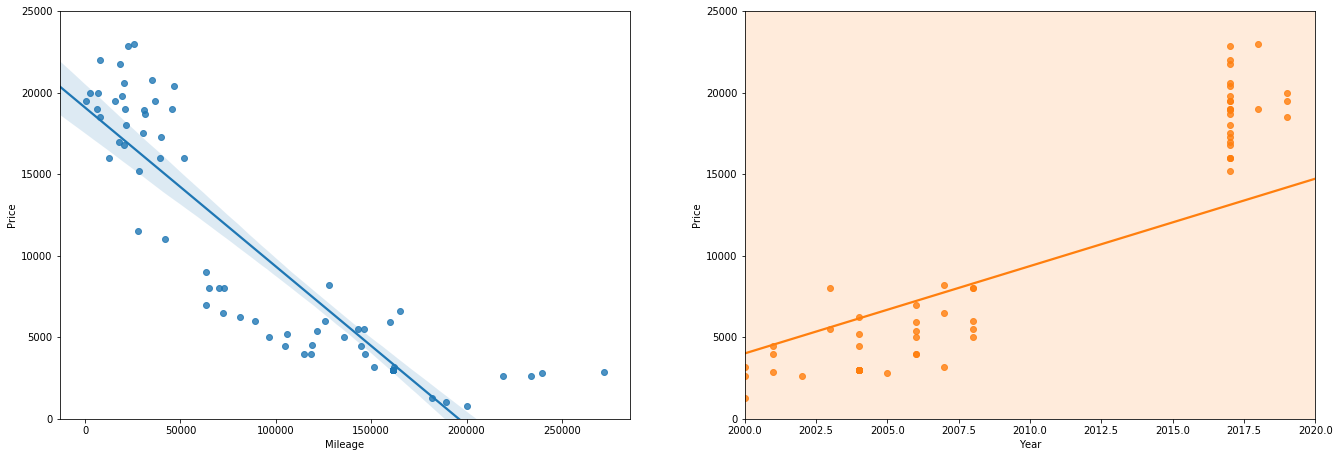

Ferrari
	156 cars with values > 23000
	1 cars with values < 23000


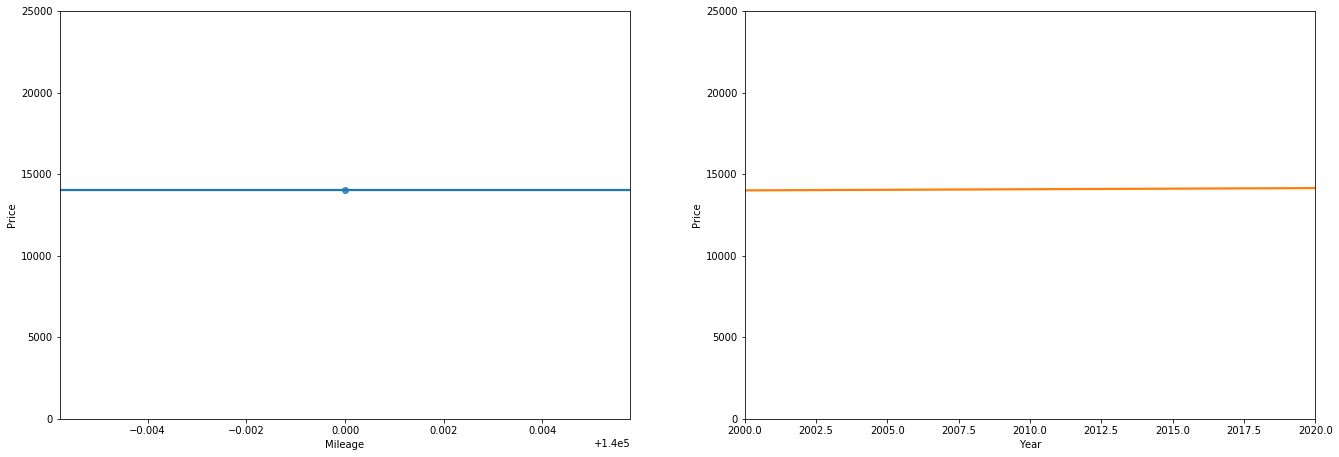

Bugatti
	1 cars with values > 23000
	0 cars with values < 23000


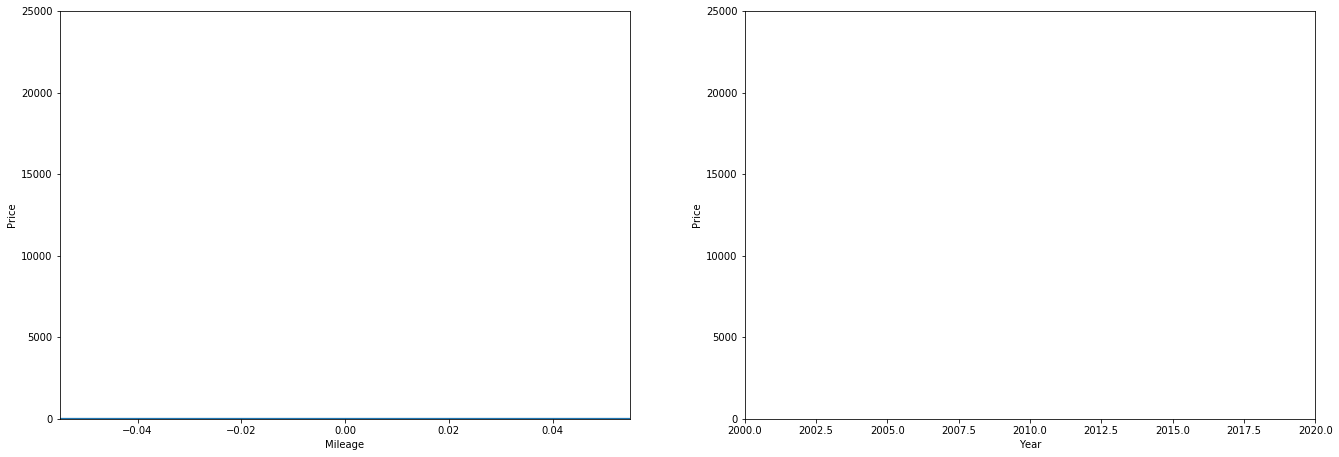

Cadillac
	159 cars with values > 23000
	56 cars with values < 23000


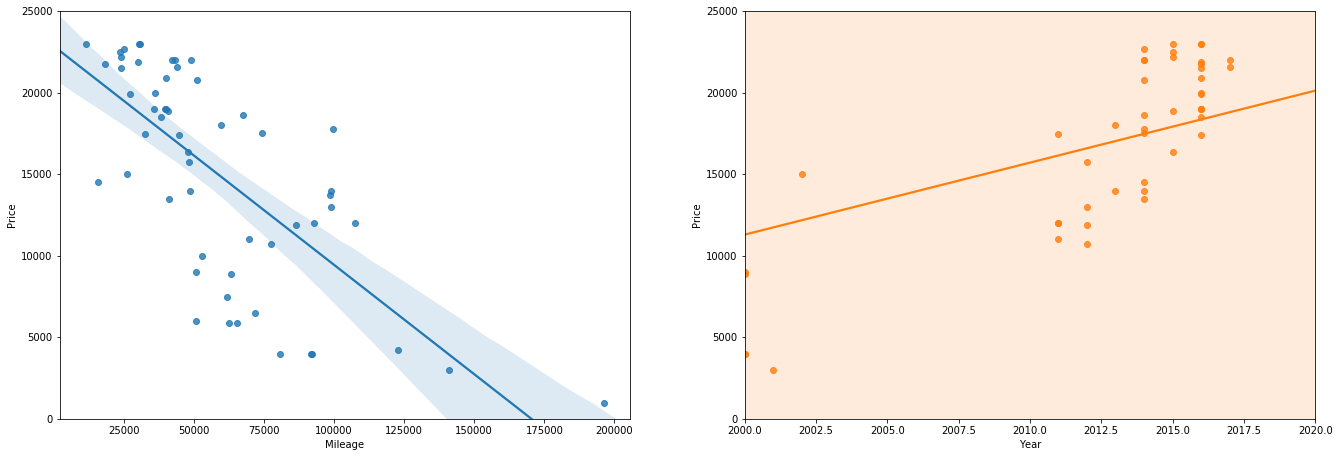

Lamborghini
	80 cars with values > 23000
	0 cars with values < 23000


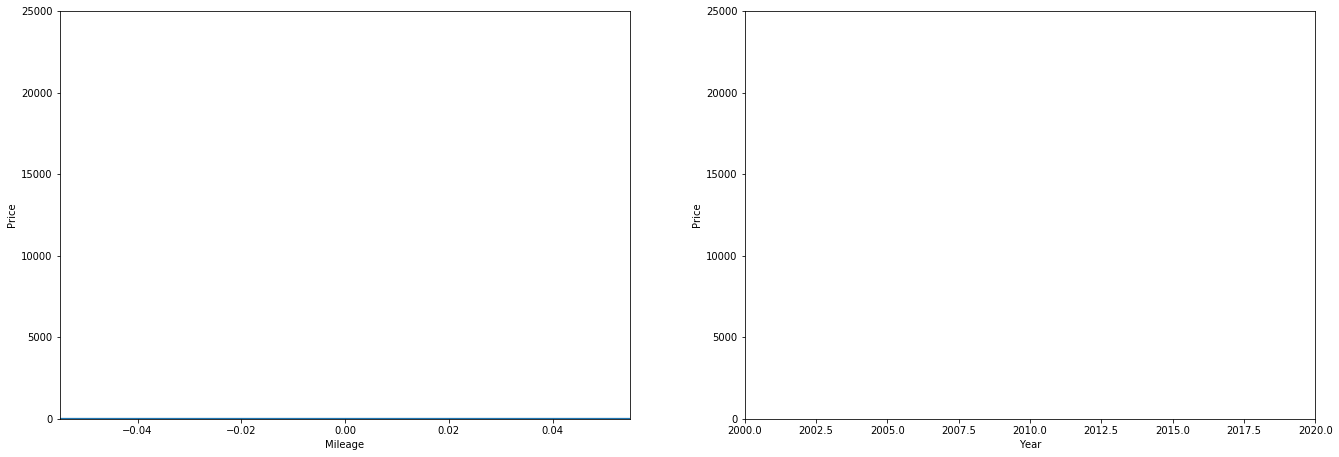

Mitsubishi
	2 cars with values > 23000
	128 cars with values < 23000


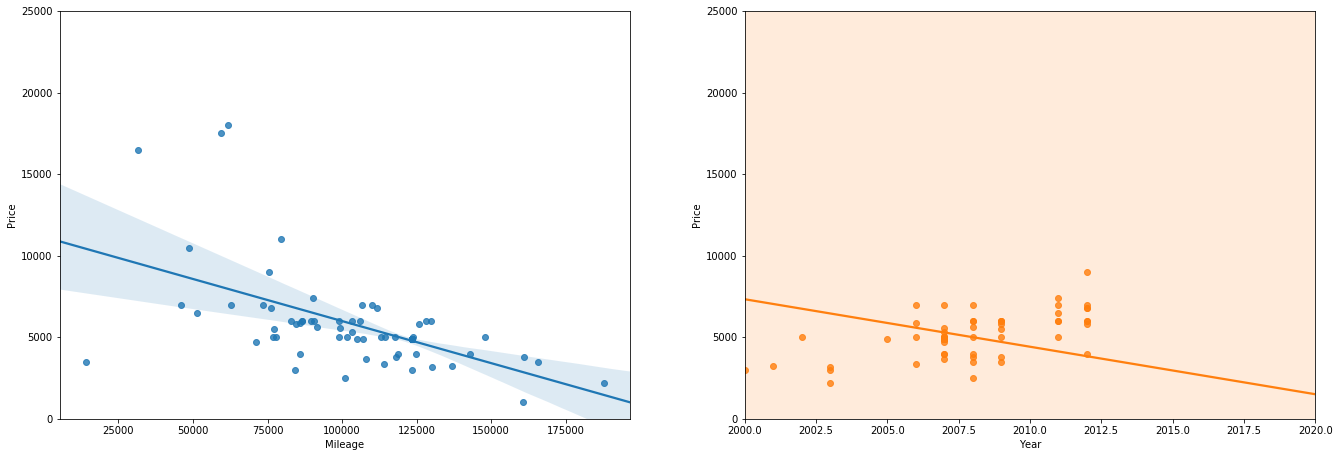

Maserati
	264 cars with values > 23000
	5 cars with values < 23000


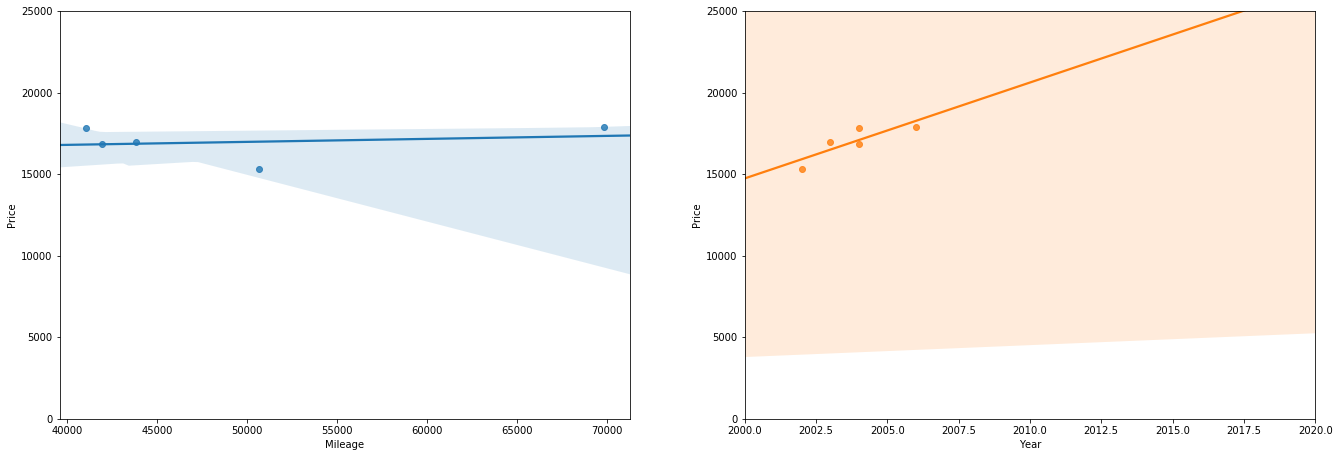

Bentley
	116 cars with values > 23000
	0 cars with values < 23000


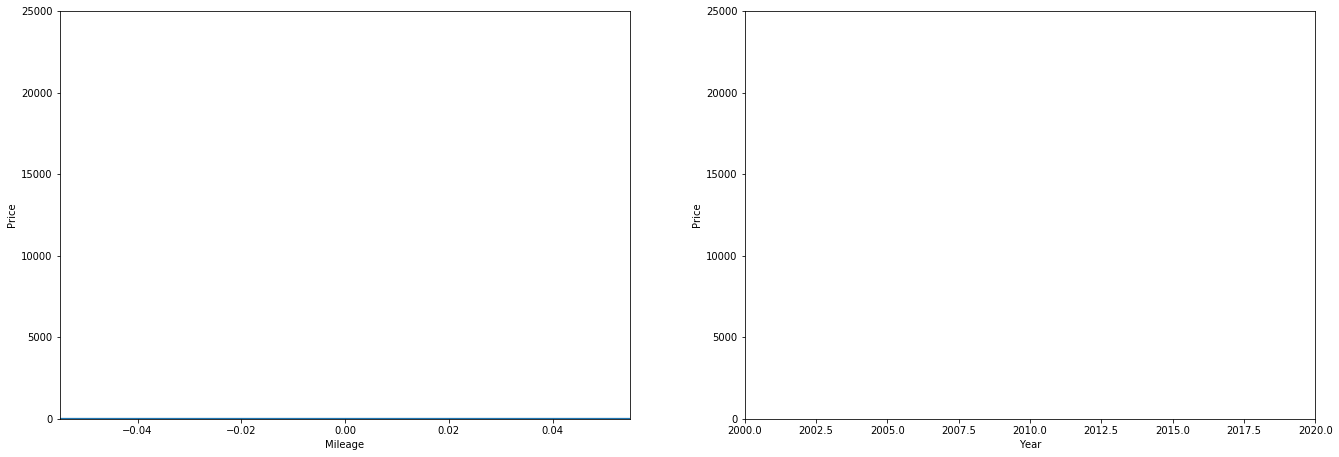

Volvo
	0 cars with values > 23000
	1 cars with values < 23000


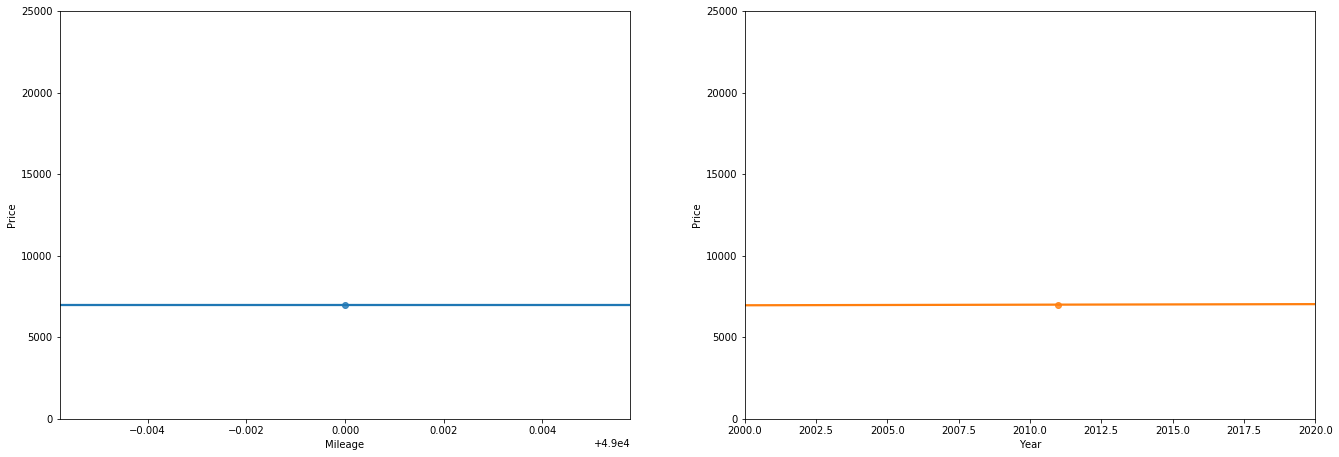

Dodge
	279 cars with values > 23000
	133 cars with values < 23000


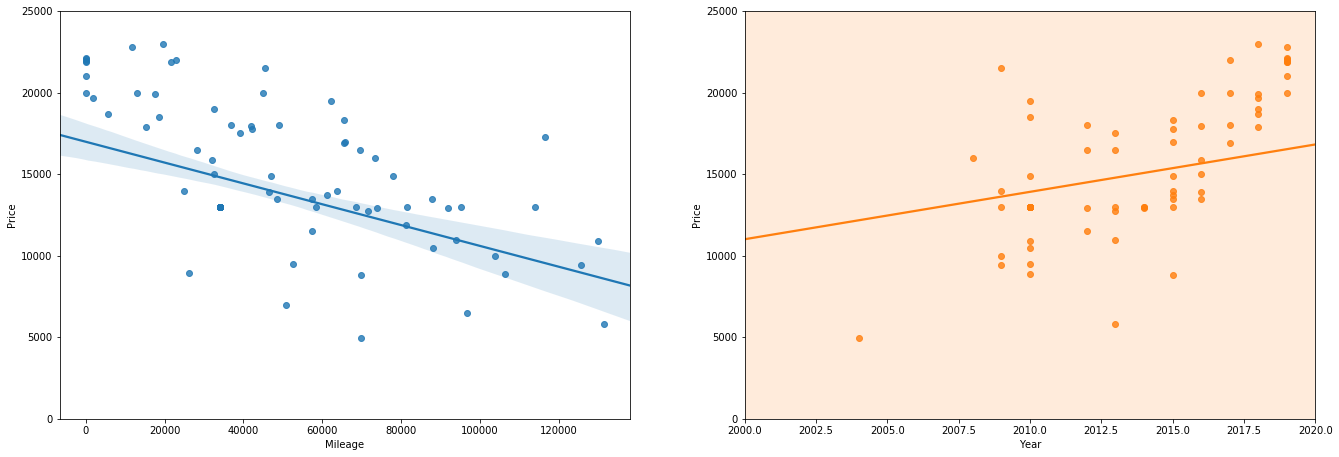

Alfa
	8 cars with values > 23000
	1 cars with values < 23000


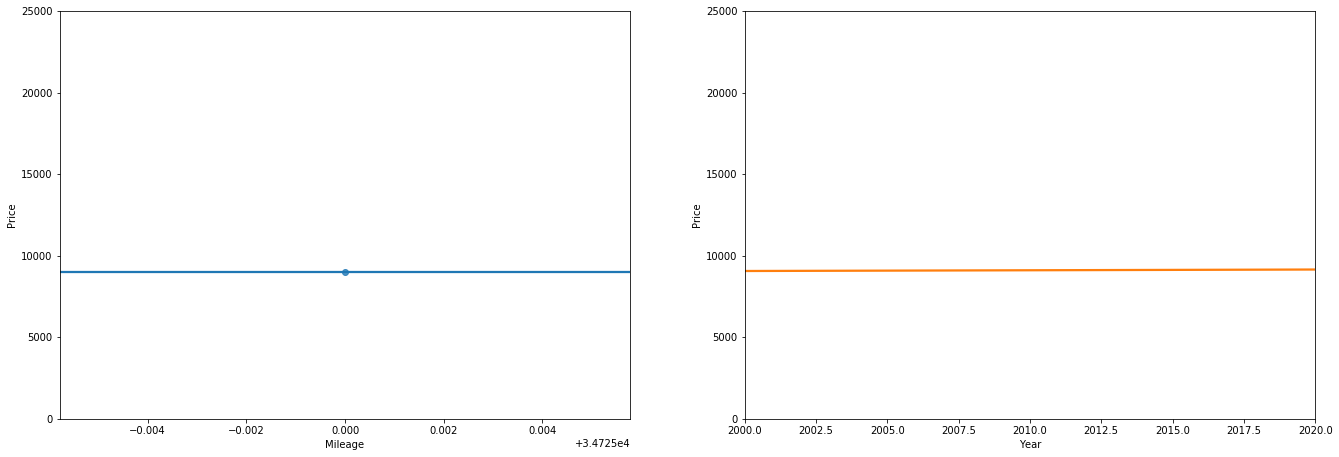

Buick
	4 cars with values > 23000
	85 cars with values < 23000


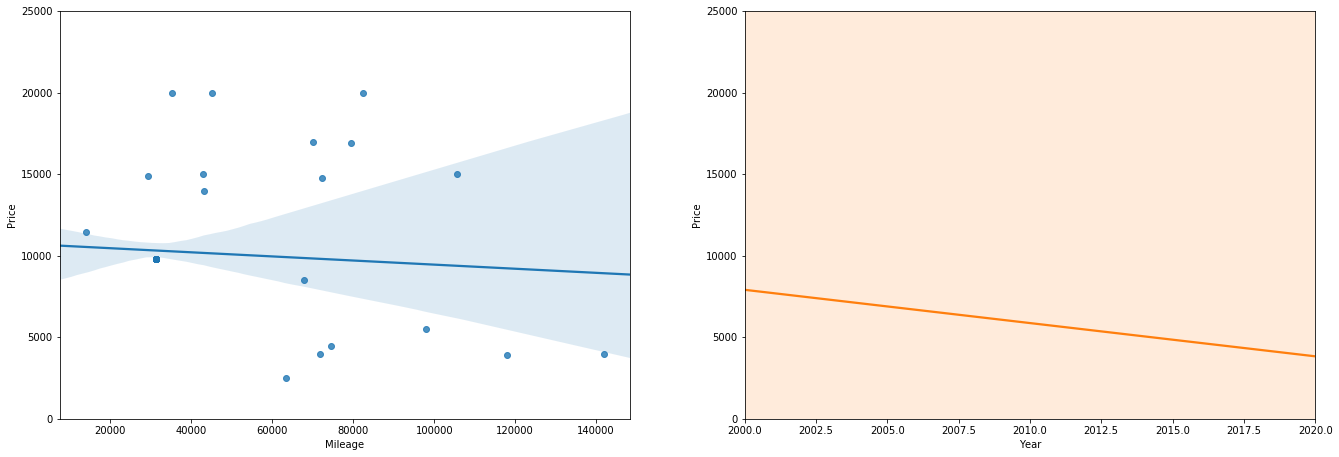

Oldsmobile
	1 cars with values > 23000
	8 cars with values < 23000


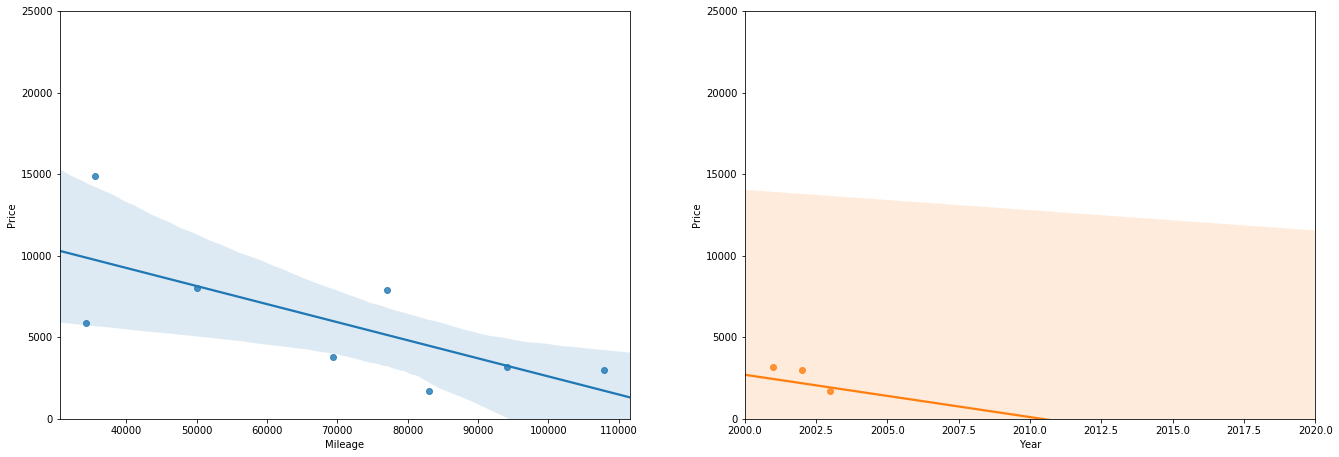

Mercury
	0 cars with values > 23000
	6 cars with values < 23000


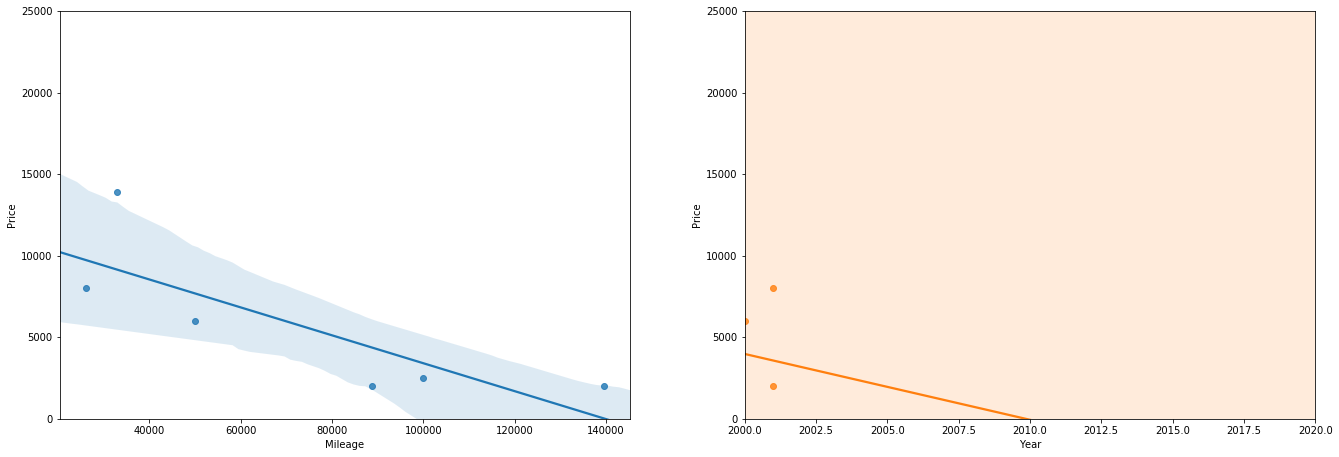

MINI
	0 cars with values > 23000
	24 cars with values < 23000


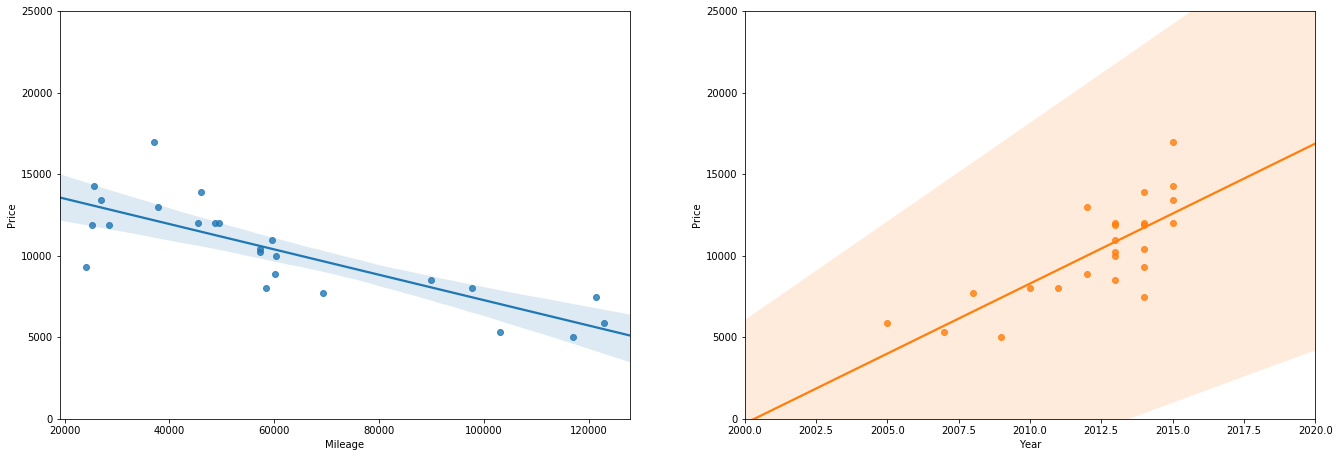

McLaren
	27 cars with values > 23000
	0 cars with values < 23000


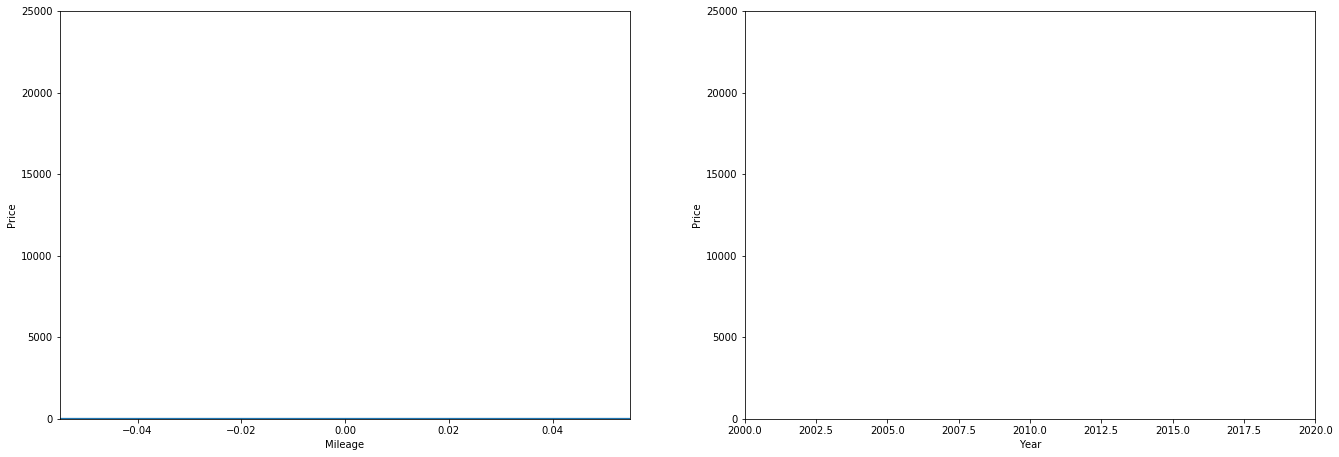

Datsun
	1 cars with values > 23000
	4 cars with values < 23000


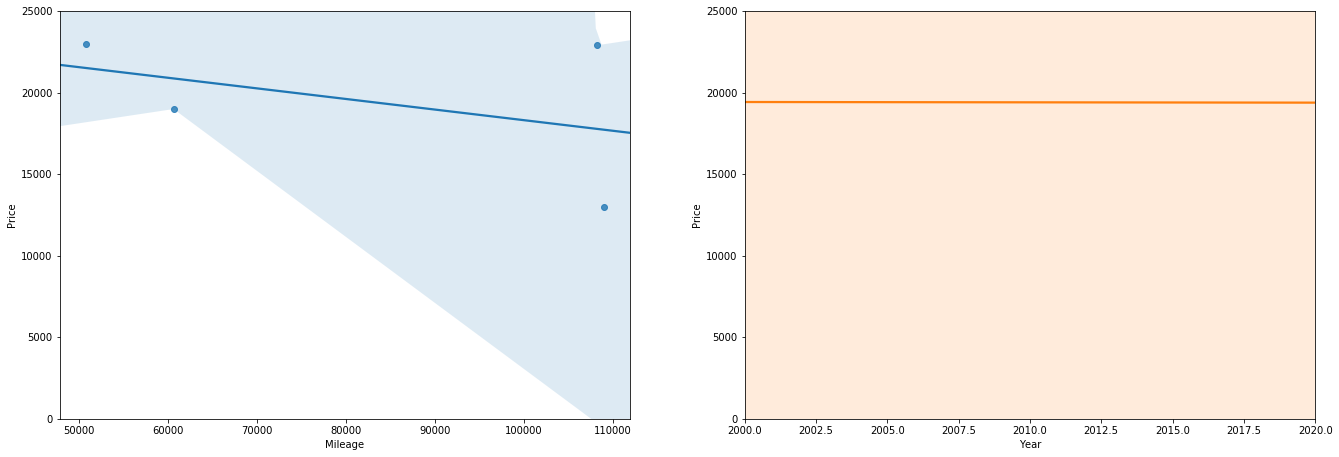

Rolls-Royce
	25 cars with values > 23000
	0 cars with values < 23000


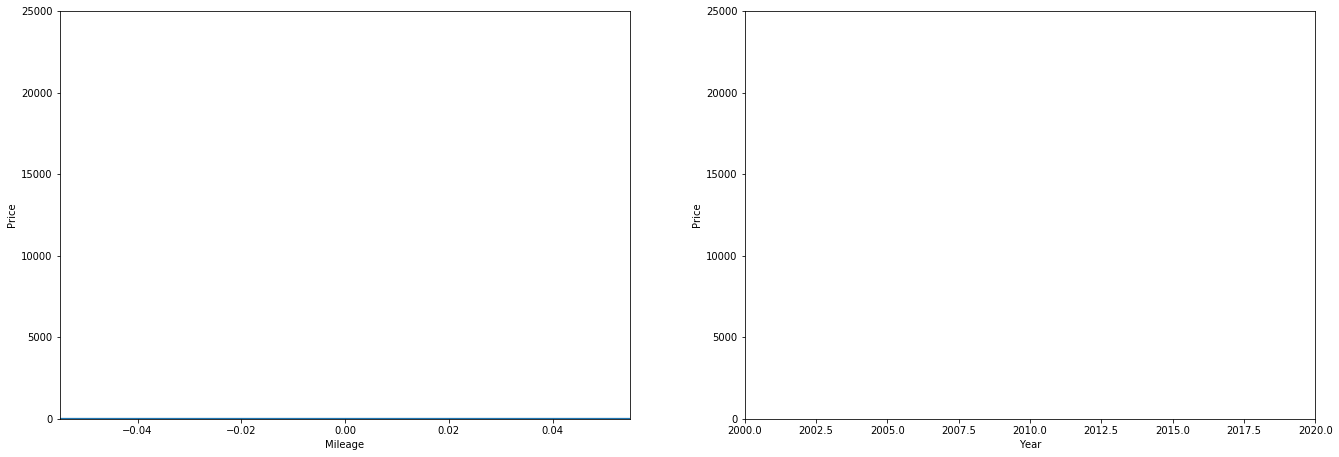

FIAT
	0 cars with values > 23000
	2 cars with values < 23000


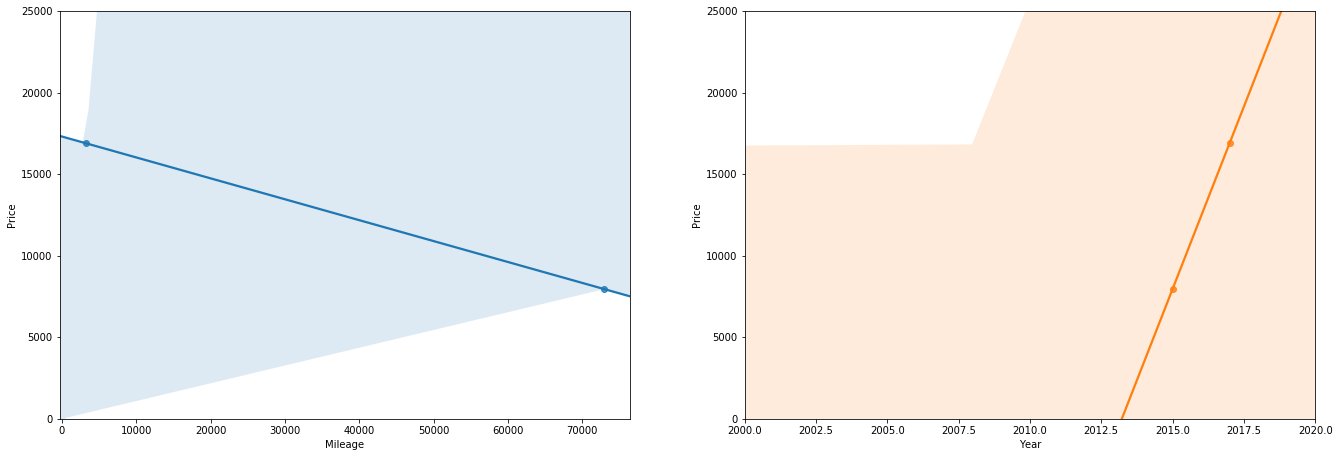

Kia
	0 cars with values > 23000
	18 cars with values < 23000


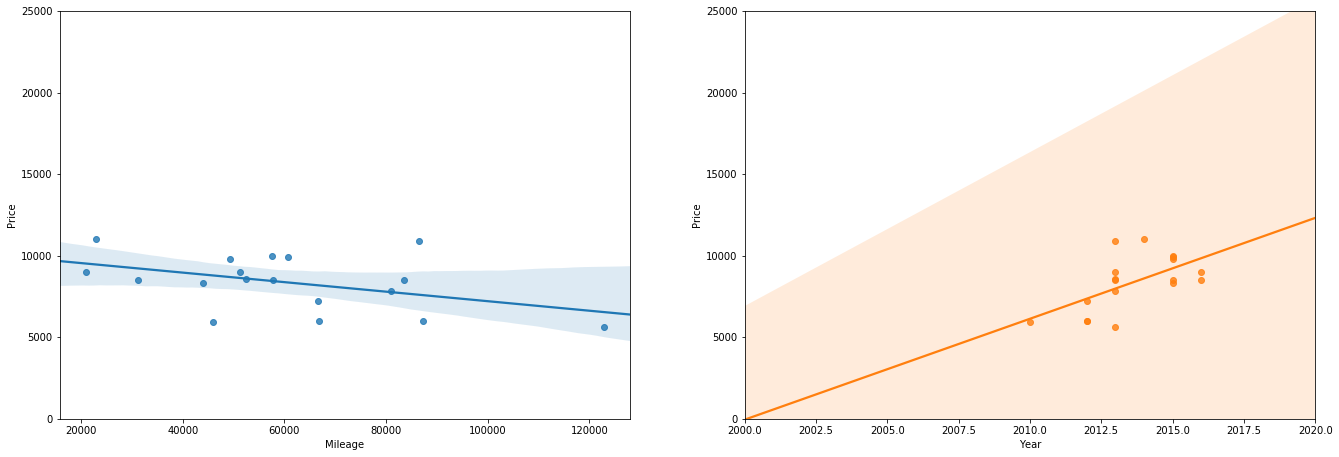

Saturn
	0 cars with values > 23000
	10 cars with values < 23000


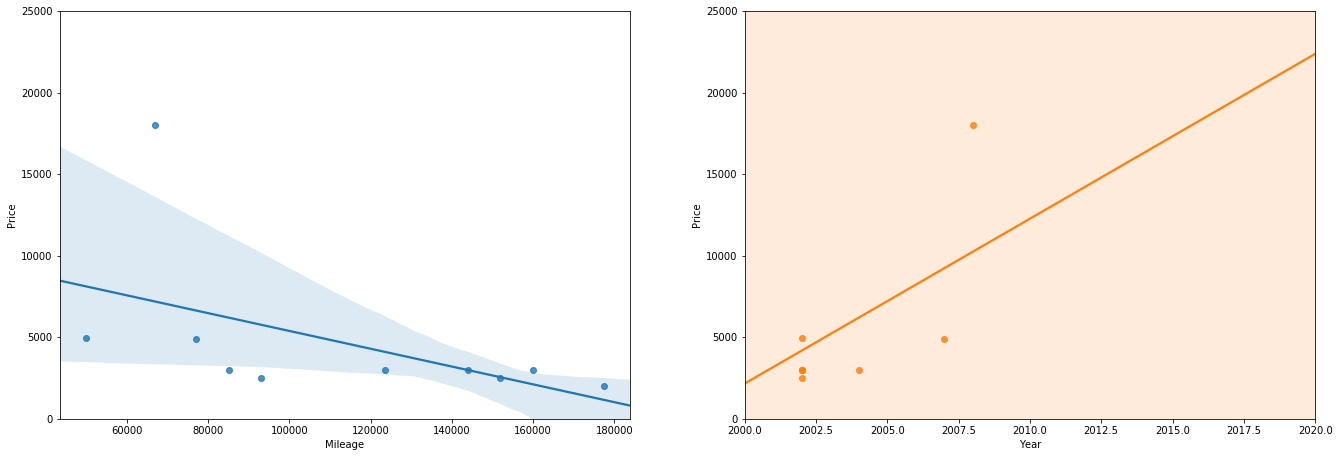

Delorean
	1 cars with values > 23000
	0 cars with values < 23000


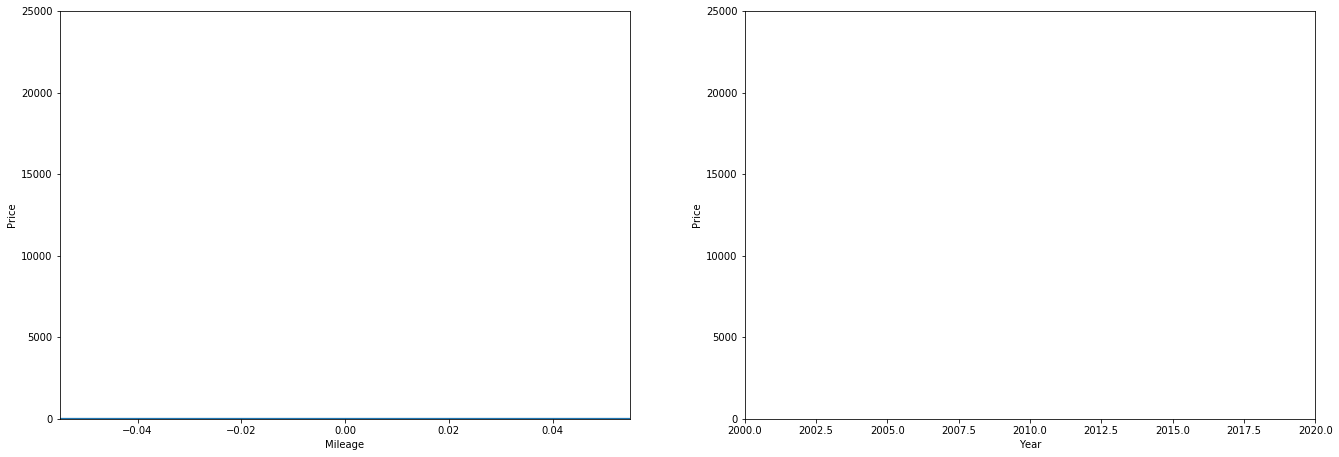

Plymouth
	2 cars with values > 23000
	0 cars with values < 23000


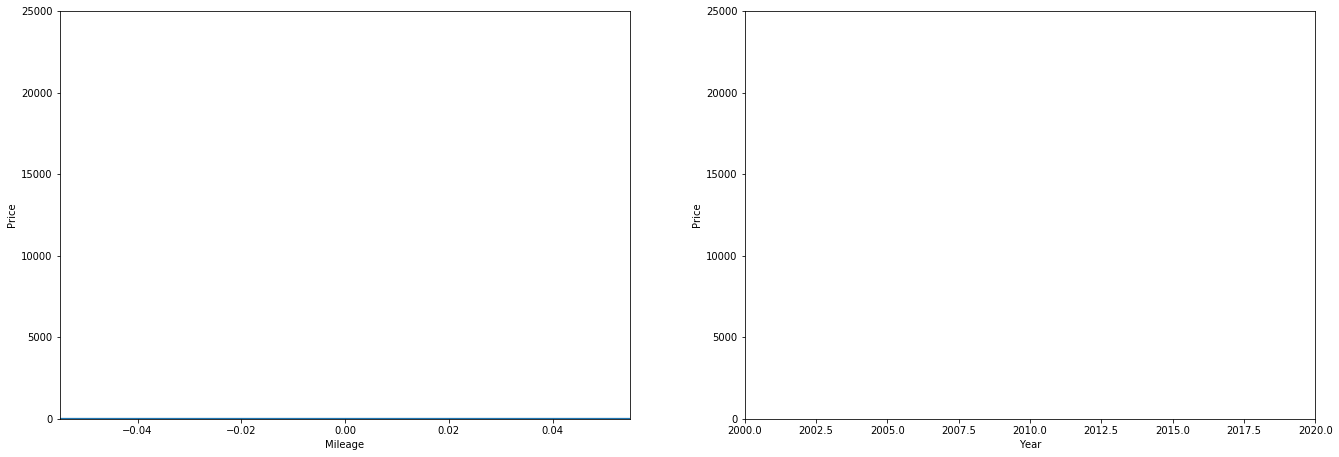

Studebaker
	0 cars with values > 23000
	1 cars with values < 23000


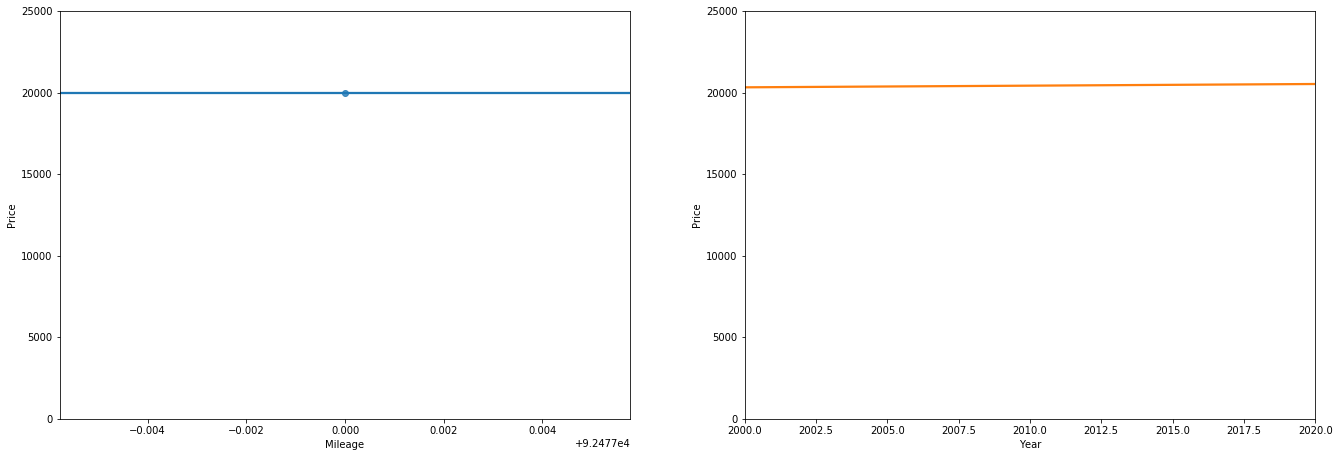

American
	1 cars with values > 23000
	0 cars with values < 23000


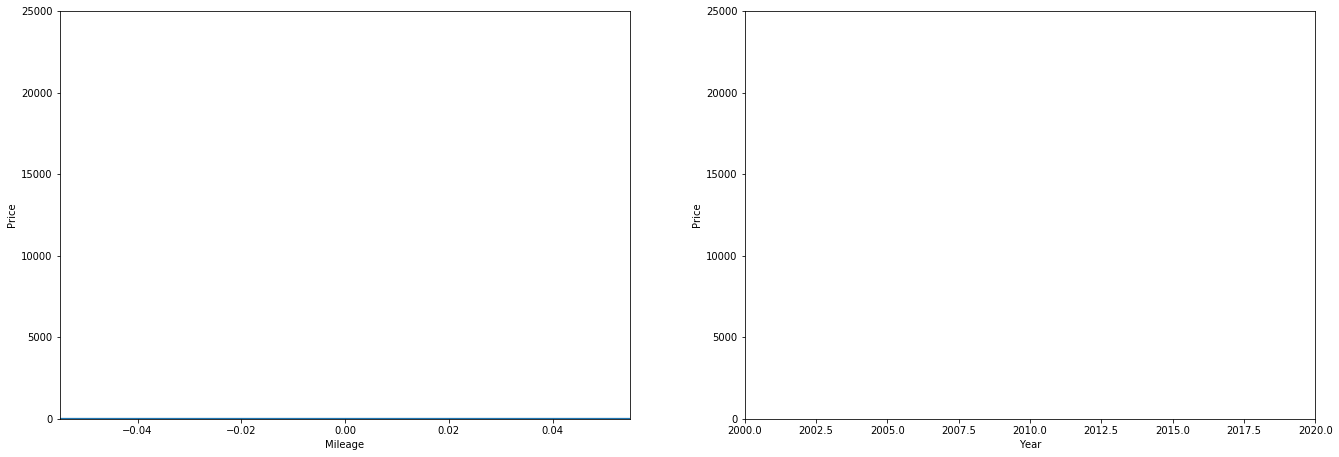

DeTomaso
	1 cars with values > 23000
	0 cars with values < 23000


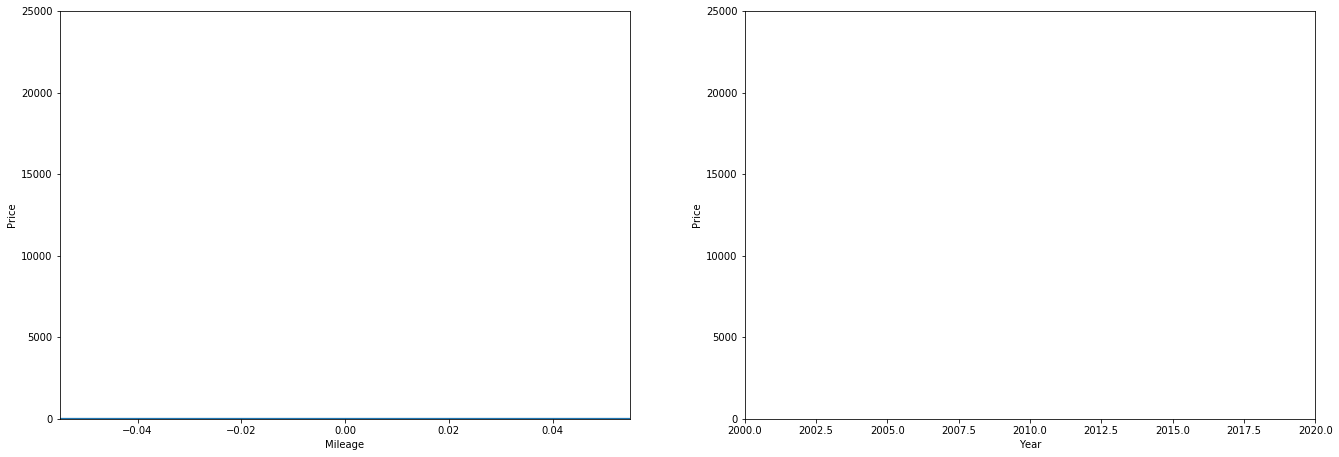

MG
	0 cars with values > 23000
	67 cars with values < 23000


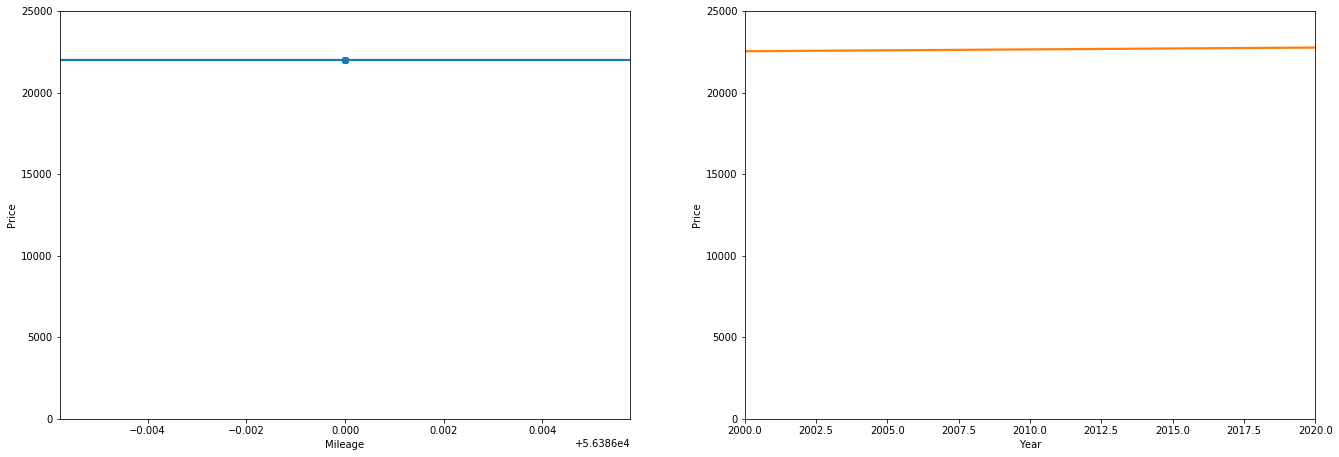

In [68]:
for make in makes:
    print(f'{make}')
    print(f'\t{len(cars[(cars["Make"] == make) & (cars["Price"] >= 23000)])} cars with values > 23000')
    print(f'\t{len(cars[(cars["Make"] == make) & (cars["Price"] < 23000)])} cars with values < 23000')
#     try:
    temp_df = cars[(cars['Make'] == make) & (cars['Price'] < 23000)][['Price', 'Mileage', 'Year']].sort_values(['Mileage'])
    fig = plt.figure(figsize=[22.5, 7.5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    sns.regplot(x='Mileage',y='Price',data=temp_df, fit_reg=True, ax=ax1)
    sns.regplot(x='Year',y='Price',data=temp_df, fit_reg=True, ax=ax2)

#     fig.title(make)
#     ax1.ylabel('Price ($)')
#     ax2.ylabel('Year')
    ax2.set_xlim([2000, 2020])
    ax2.set_ylim([0, 25000])
    ax1.set_ylim([0, 25000])
    plt.show()
#     except:
#           print('\tCan\'t afford any of these.')